# Initialization

In [2]:
import pandas as pd
import numpy as np
import difflib
import os
import matplotlib.pyplot as plt

In [3]:
os.chdir('C:/Cours DTU/1. Model-based Machine Learning/Project/european_vote_analysis')

In [4]:
data_european = pd.read_csv('data/raw/COMEPELDA_aggregate_v1.00.csv')
data_national = pd.read_csv('data/raw/1999-2019_CHES_dataset_means.csv')
country_codes = pd.read_csv('data/raw/countries.csv')
party_names = pd.read_csv('data/raw/partyNames_ncv2.csv')

# Shape of the data

In [5]:
print(data_european.shape)
print(data_national.shape)

(1806, 46)
(1196, 84)


# Distribution of number of parties per country per year (CHES) - Graph

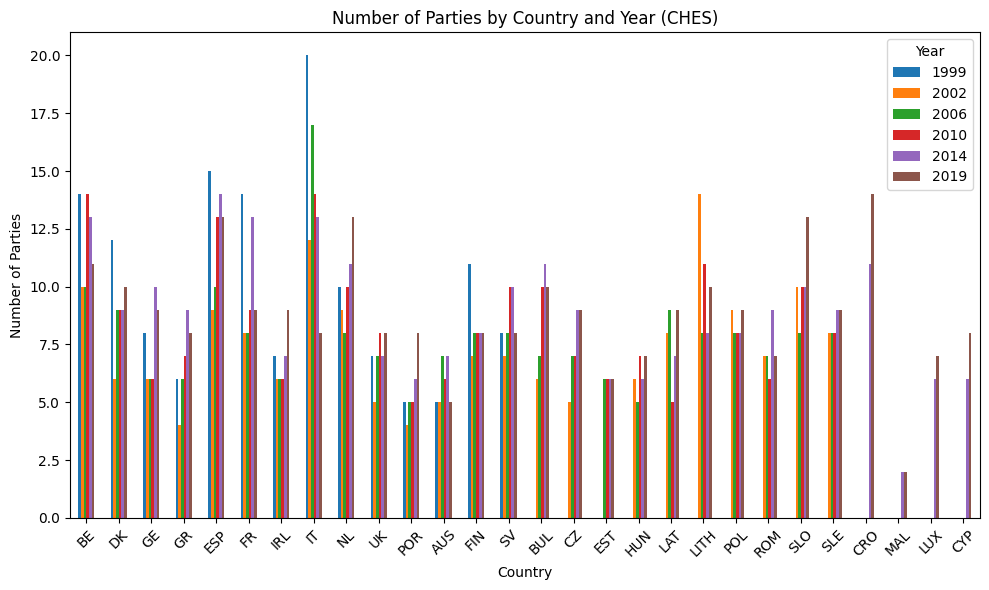

In [6]:
# on CHES dataset
country_nb = (data_national['country'].unique())
country_code = ["BE","DK","GE","GR","ESP","FR","IRL","IT","NL","UK","POR","AUS","FIN","SV","BUL","CZ","EST","HUN","LAT","LITH","POL","ROM","SLO","SLE","CRO","MAL","LUX","CYP"]
country_dic = {country_nb[i]: country_code[i] for i in range(len(country_nb))}
years = data_national["year"].unique()

party_nb_peryear_distrib = np.empty([country_nb.size,years.size])

for i in range(len(country_nb)):
    country = country_nb[i]
    for j in range(len(years)):
        year = years[j]
        count_parties = len(data_national[(data_national['country']==country) & (data_national['year']==year)])
        party_nb_peryear_distrib[i][j] = count_parties
        #print("In {:}, for country {:}, there are {:} distinct parties.".format(year, country_dic.get(country),count_parties))

pd.DataFrame(party_nb_peryear_distrib).plot(kind='bar', figsize=(10, 6))
plt.title('Number of Parties by Country and Year (CHES)')
plt.xlabel('Country')
plt.ylabel('Number of Parties')
plt.legend(years,title='Year')
plt.xticks(np.arange(len(country_code)),list(country_dic.values()),rotation=45)
plt.tight_layout()
plt.show()
plt.close()

# Distribution of number of parties per country per year (CHES) - stats

In [7]:

for i in range(len(years)):
    distrib_year = party_nb_peryear_distrib[:,i][party_nb_peryear_distrib[:,i]>1]
    countries_year = len(distrib_year)
    mean_year = np.mean(distrib_year)
    total_year = sum(distrib_year)
    print("Number of countries surveyed in {:}: {:}. Average number of parties in countries surveyed: {:}, TOTAL: {:}".format(years[i],countries_year,mean_year, total_year))



Number of countries surveyed in 1999: 14. Average number of parties in countries surveyed: 10.142857142857142, TOTAL: 142.0
Number of countries surveyed in 2002: 23. Average number of parties in countries surveyed: 7.434782608695652, TOTAL: 171.0
Number of countries surveyed in 2006: 24. Average number of parties in countries surveyed: 7.833333333333333, TOTAL: 188.0
Number of countries surveyed in 2010: 24. Average number of parties in countries surveyed: 8.458333333333334, TOTAL: 203.0
Number of countries surveyed in 2014: 28. Average number of parties in countries surveyed: 8.75, TOTAL: 245.0
Number of countries surveyed in 2019: 28. Average number of parties in countries surveyed: 8.821428571428571, TOTAL: 247.0


# Distribution of number of parties per country per year (COMEPELDA) - Graph

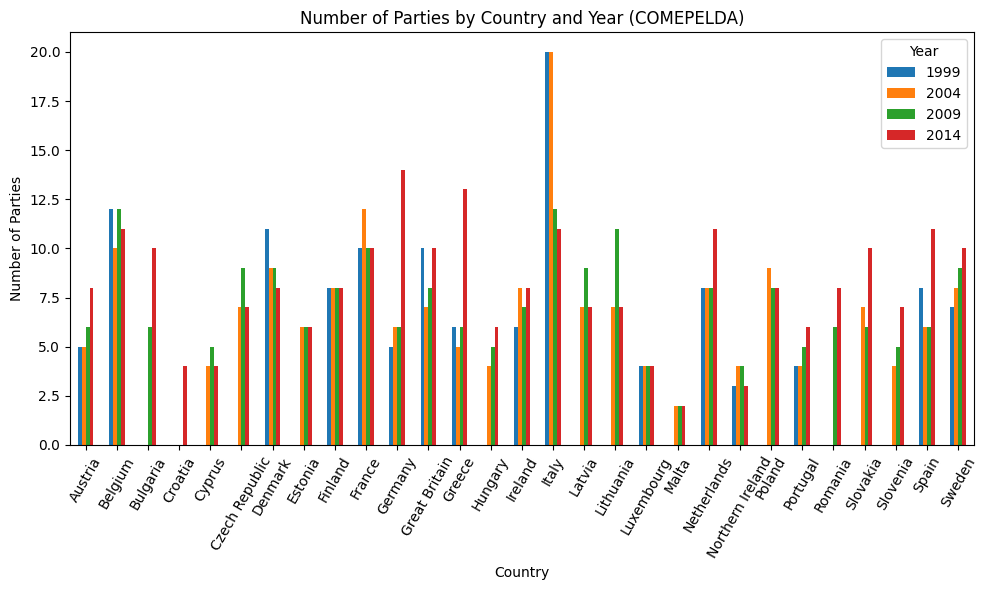

In [11]:
country_names = (data_european['cName'].unique())
years = data_european["ElYear"].unique()[:4] #ignore non EP elections
#cValid = nb pf votes in country in year

eu_parties_nb_peryear_distrib = np.empty([country_names.size,years.size])

for i in range(len(country_names)):
    country = country_names[i]
    for j in range(len(years)):
        year = years[j]
        count_parties = len(data_european[(data_european['cName']==country) & (data_european['ElYear']==year)]["pName"].unique())
        eu_parties_nb_peryear_distrib[i][j] = count_parties
        #print("In {:}, for country {:}, there are {:} distinct parties.".format(year, country_dic.get(country),count_parties))

pd.DataFrame(eu_parties_nb_peryear_distrib).plot(kind='bar', figsize=(10, 6))
plt.title('Number of Parties by Country and Year (COMEPELDA)')
plt.xlabel('Country')
plt.ylabel('Number of Parties')
plt.legend(years,title='Year')
plt.xticks(np.arange(len(country_names)),country_names,rotation=60)
plt.tight_layout()
plt.show()
plt.close()

# Distribution of number of parties per country per year (COMEPELDA) - stats

In [12]:

for i in range(len(years)):
    distrib_year = eu_parties_nb_peryear_distrib[:,i][eu_parties_nb_peryear_distrib[:,i]>1]
    countries_year = len(distrib_year)
    mean_year = np.mean(distrib_year)
    total_year = sum(distrib_year)
    print("Number of countries surveyed in {:}: {:}. Average number of parties in countries surveyed: {:}, TOTAL: {:}".format(years[i],countries_year,mean_year, total_year))



Number of countries surveyed in 1999: 16. Average number of parties in countries surveyed: 7.9375, TOTAL: 127.0
Number of countries surveyed in 2004: 26. Average number of parties in countries surveyed: 6.961538461538462, TOTAL: 181.0
Number of countries surveyed in 2009: 28. Average number of parties in countries surveyed: 7.071428571428571, TOTAL: 198.0
Number of countries surveyed in 2014: 29. Average number of parties in countries surveyed: 8.0, TOTAL: 232.0


# Distribution of absolute votes in EP Elections per country (COMEPELDA) - graph

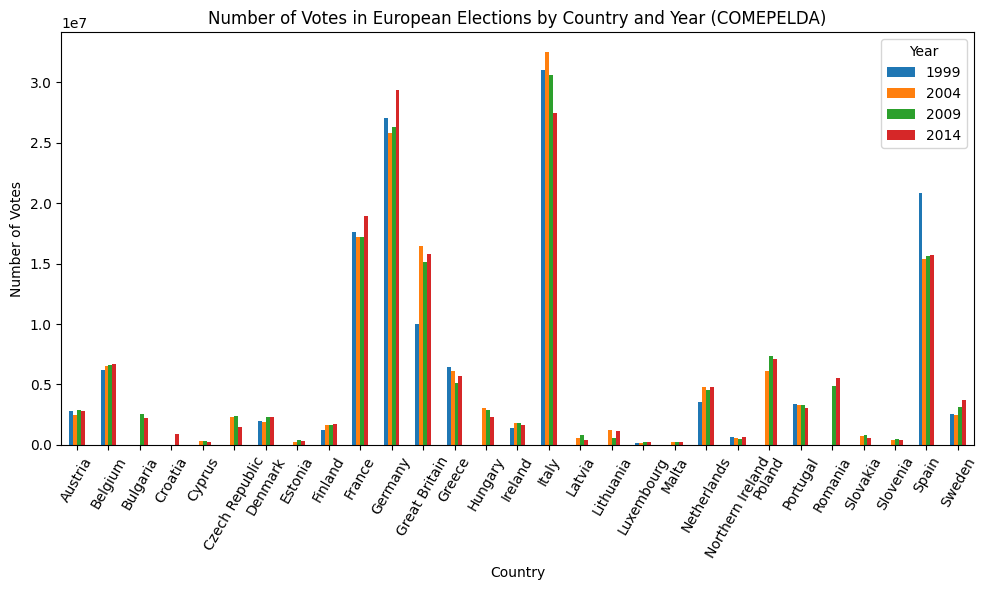

In [8]:
country_names = (data_european['cName'].unique())
years = data_european["ElYear"].unique()[:4] #ignore non EP elections
#cValid = nb pf votes in country in year

votes_nb_peryear_distrib = np.empty([country_names.size,years.size])

for i in range(len(country_names)):
    country = country_names[i]
    for j in range(len(years)):
        year = years[j]
        count_votes = next(iter(list(data_european[(data_european['cName']==country) & (data_european['ElYear']==year)]["cValid"])), None)
        votes_nb_peryear_distrib[i][j] = count_votes
        #print("In {:}, for country {:}, there are {:} distinct parties.".format(year, country_dic.get(country),count_parties))

pd.DataFrame(votes_nb_peryear_distrib).plot(kind='bar', figsize=(10, 6))
plt.title('Number of Votes in European Elections by Country and Year (COMEPELDA)')
plt.xlabel('Country')
plt.ylabel('Number of Votes')
plt.legend(years,title='Year')
plt.xticks(np.arange(len(country_names)),country_names,rotation=60)
plt.tight_layout()
plt.show()
plt.close()

# Distribution of absolute votes in EP Elections per country (COMEPELDA) - stats

In [9]:
for i in range(len(years)):
    distrib_year = votes_nb_peryear_distrib[:,i][votes_nb_peryear_distrib[:,i]>1]
    countries_year = len(distrib_year)
    mean_year = np.mean(distrib_year)
    total_year = sum(distrib_year)
    print("Number of countries part of EP elections in {:}: {:}.".format(years[i],countries_year))
    print("Average number of votants per country in {:}: {:}.".format(years[i],mean_year))
    print("Total votes cast in EP elections in {:}: {:}.".format(years[i],total_year))
    print("----------------------------------------------")



Number of countries part of EP elections in 1999: 16.
Average number of votants per country in 1999: 8558048.4375.
Total votes cast in EP elections in 1999: 136928775.0.
----------------------------------------------
Number of countries part of EP elections in 2004: 26.
Average number of votants per country in 2004: 5934810.384615385.
Total votes cast in EP elections in 2004: 154305070.0.
----------------------------------------------
Number of countries part of EP elections in 2009: 28.
Average number of votants per country in 2009: 5738819.464285715.
Total votes cast in EP elections in 2009: 160686945.0.
----------------------------------------------
Number of countries part of EP elections in 2014: 29.
Average number of votants per country in 2014: 5639680.275862069.
Total votes cast in EP elections in 2014: 163550728.0.
----------------------------------------------
